# Final Project Submission

* Student name:  Natalya Doris
* Student pace: self paced
* Scheduled project review date/time: 
* Instructor name: Abhineet Kulkarni
* Blog post URL:


## Data Inspection and Initial Cleaning

### Import Data & Necessary Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_validate, ShuffleSplit
from datetime import datetime

df = pd.read_csv('data/kc_house_data.csv')
df.head()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [3]:
print(len(df[df["waterfront"].isna()]))
print(len(df[df["waterfront"].isna() & (df["view"]=='NONE')]))
print(len(df[df["view"].isna()]))
print(len(df[df["yr_renovated"].isna()]))
print(len(df[df["yr_renovated"]==0])) 
# could create a categorical variable - whether a house was renovated, or renovated after certain yr

2376
2110
63
3842
17011


In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


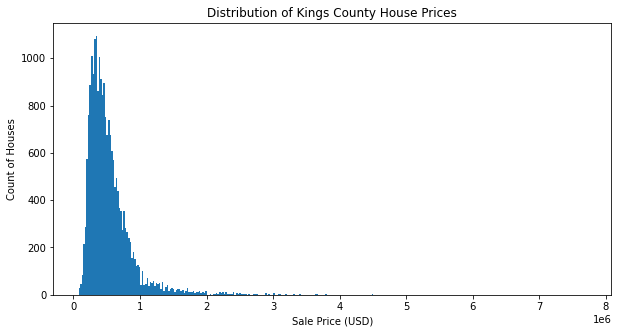

In [5]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.hist(df['price'], bins='auto')

ax.set_xlabel("Sale Price (USD)")
ax.set_ylabel("Count of Houses")
ax.set_title("Distribution of Kings County House Prices");

In [6]:
len(set(df['zipcode'])) # this will be categorical

70

In [38]:
y = df['price']
X = df.drop(['price'], axis=1)

### Handling Missing Values

In [8]:
X.isna().sum()

id                  0
date                0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [39]:
X['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2013.0       31
2003.0       31
2007.0       30
          ...  
1951.0        1
1953.0        1
1946.0        1
1976.0        1
1948.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [40]:
X['yr_renovated'][X['yr_renovated'] == 0] = 'N/A'
X['yr_renovated'][X['yr_renovated'].isna()] = 'N/A'
set(X['yr_renovated'])

#[f(x) if condition else g(x) for x in sequence]
X['renovated'] = [False if house=='N/A' else True for house in X['yr_renovated']]
sum(X['renovated'])

/var/folders/wl/4cw_k4nj07d773kdv1fw53tc0000gn/T/ipykernel_23066/3179396105.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['yr_renovated'][X['yr_renovated'] == 0] = 'N/A'


744

In [50]:
X['view'][X['view'].isna()] = 'N/A'
set(X['view'])

/var/folders/wl/4cw_k4nj07d773kdv1fw53tc0000gn/T/ipykernel_23066/839894500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['view'][X['view'].isna()] = 'N/A'


{'AVERAGE', 'EXCELLENT', 'FAIR', 'GOOD', 'N/A', 'NONE'}

In [42]:
X['waterfront'][X['waterfront'].isna()] = 'N/A'
X['waterfront'].value_counts()

/var/folders/wl/4cw_k4nj07d773kdv1fw53tc0000gn/T/ipykernel_23066/1996257895.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['waterfront'][X['waterfront'].isna()] = 'N/A'


NO     19075
N/A     2376
YES      146
Name: waterfront, dtype: int64

In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  object 
 8   view           21597 non-null  object 
 9   condition      21597 non-null  object 
 10  grade          21597 non-null  object 
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  object 
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

### Convert some categoricals into more useable format 

In [43]:
print(X['date'][0])

X['date'] = [datetime.strptime(date, '%m/%d/%Y') for date in X['date']]
X['yr_sold'] = pd.DatetimeIndex(X['date']).year
X['mth_sold'] = pd.DatetimeIndex(X['date']).month

X.head()

10/13/2014


,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,yr_sold,mth_sold
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,N/A,NONE,Average,...,1955,N/A,98178,47.5112,-122.257,1340,5650,False,2014,10
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,NO,NONE,Average,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,True,2014,12
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,NO,NONE,Average,...,1933,N/A,98028,47.7379,-122.233,2720,8062,False,2015,2
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,NO,NONE,Very Good,...,1965,N/A,98136,47.5208,-122.393,1360,5000,False,2014,12
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,NO,NONE,Average,...,1987,N/A,98074,47.6168,-122.045,1800,7503,False,2015,2


In [44]:
# grade
X['grade'] = [int(grade.split(" ")[0]) for grade in X['grade']]

set(X['grade'])

{3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13}

In [16]:
set(X['condition']) # should we convert this to a scale?

{'Average', 'Fair', 'Good', 'Poor', 'Very Good'}

### Train test split for future model validation

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print(f"X_train is a DataFrame with {X_train.shape[0]} rows and {X_train.shape[1]} columns")
print(f"y_train is a Series with {y_train.shape[0]} values")

X_train is a DataFrame with 16197 rows and 23 columns
y_train is a Series with 16197 values


## Baseline Model

### Check Correlations

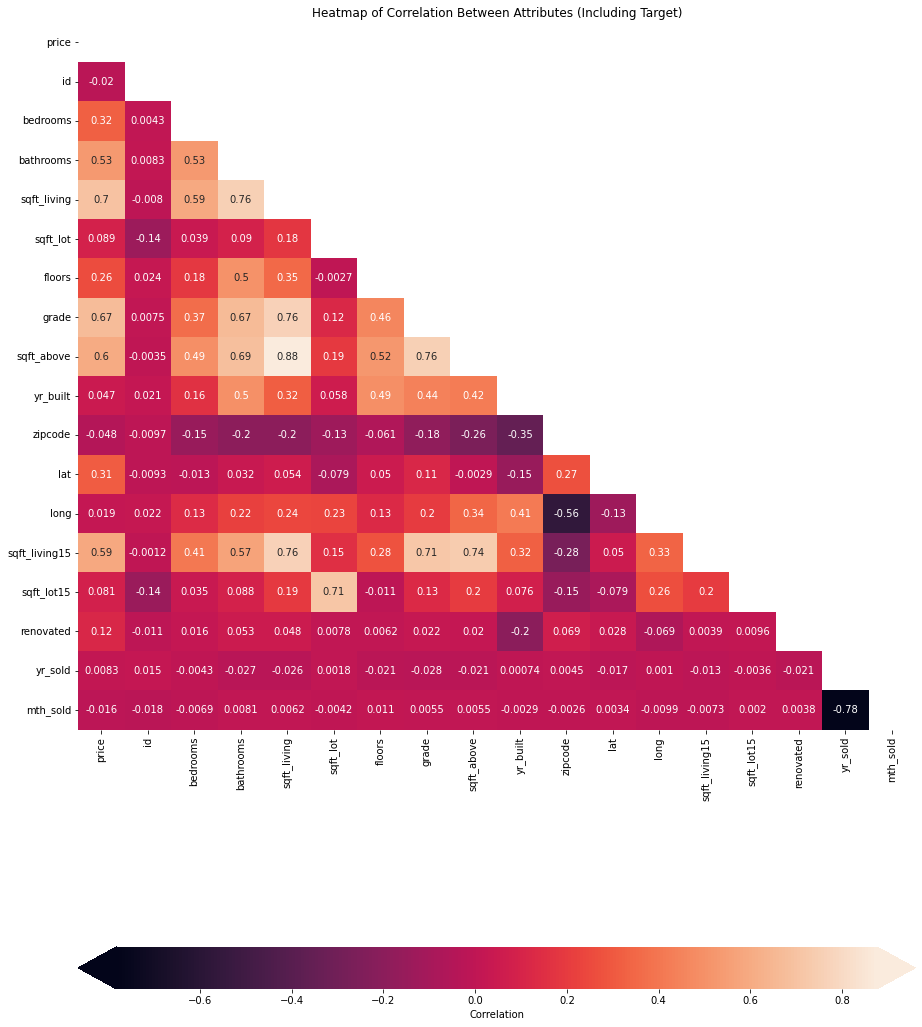

In [18]:
# Create a df with the target as the first column, then compute the correlation matrix

heatmap_data = pd.concat([y_train, X_train], axis=1)
corr = heatmap_data.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(15, 20))

# Plot a heatmap of the correlation matrix, with both numbers and colors indicating the correlations
sns.heatmap(data=corr, mask=np.triu(np.ones_like(corr, dtype=bool)), ax=ax,
    annot=True, cbar_kws={"label": "Correlation", "orientation": "horizontal", 
                          "pad": .2, "extend": "both"})

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

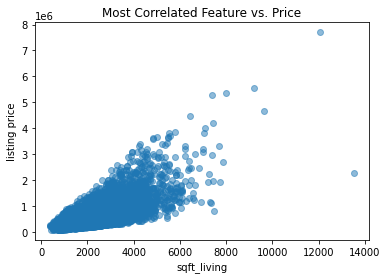

In [19]:
most_correlated_feature = 'sqft_living'

fig, ax = plt.subplots()

ax.scatter(X_train[most_correlated_feature], y_train, alpha=0.5)
ax.set_xlabel(most_correlated_feature)
ax.set_ylabel("listing price")
ax.set_title("Most Correlated Feature vs. Price");

# fairly linear, but i suspect a log transformation will improve the linearity

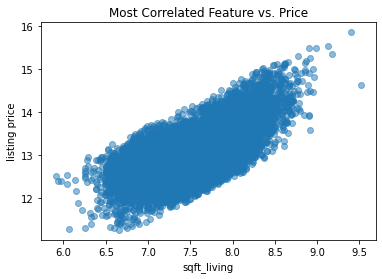

In [20]:
most_correlated_feature = 'sqft_living'

fig, ax = plt.subplots()

ax.scatter(np.log(X_train[most_correlated_feature]), np.log(y_train), alpha=0.5)
ax.set_xlabel(most_correlated_feature)
ax.set_ylabel("listing price")
ax.set_title("Most Correlated Feature vs. Price");

# very linear after log transformation

### Build Baseline Model With Most Correlated Feature as Independent Variable

In [21]:
X_base = X_train[[most_correlated_feature]]

base_model = LinearRegression()
base_model.fit(X_base, y_train)
#print(base_model.score(X_base, y_train))

splitter = ShuffleSplit(n_splits=10, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=base_model,
    X=X_base,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.4900751513463594
Validation score: 0.4903192187211487


These are the R^2 values of the train and test models using a linear regression with square footage of the living room as the independent variable and listing price as the dependent variable. We get similar R^2s for each, around 0.5, which  is a good sign that the model is predicting the test data correctly, but is a fairly low R^2 for an inferential model as currently it only explains around 50% of the variation in house price.

### Preprocess Data and Check Model Assumptions

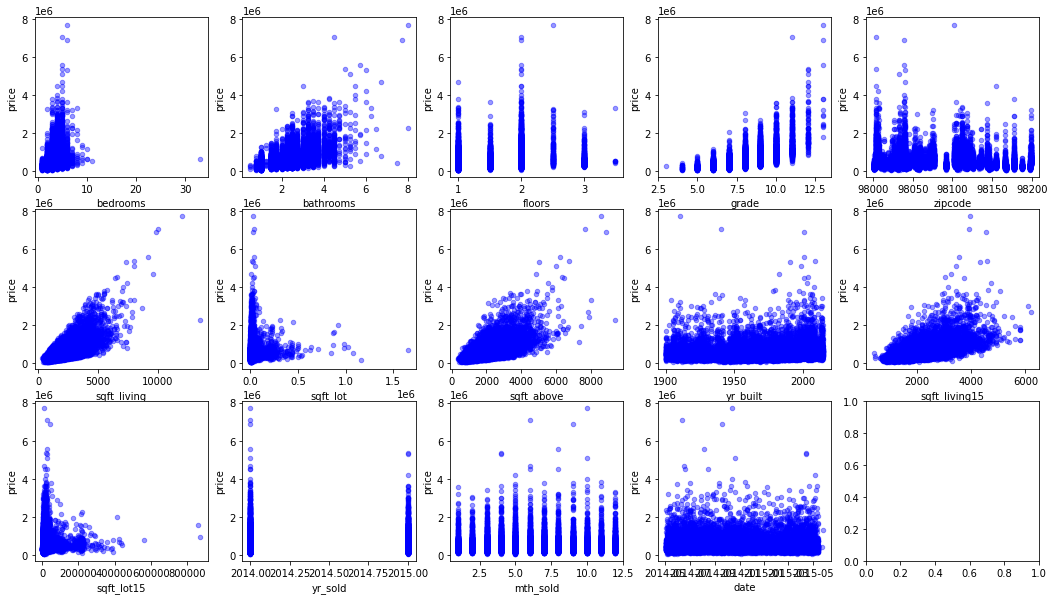

In [46]:
# visually inspecting relationships between numerical variables and price

cols = ['bedrooms', # number of bedrooms
        'bathrooms', # number of bathrooms
        'floors', # number of floors (levels) in the house
        'grade', # Overall grade of the house. Related to the construction and design of the house
        'zipcode', #  zip code
        'sqft_living', # sq. ft. of living space
        'sqft_lot', # Square footage of the lot
        'sqft_above', # Square footage of house apart from basement
        'yr_built', # year house was built
        'sqft_living15', # sq. ft. of interior housing living space for the nearest 15 neighbors
        'sqft_lot15', # sq. ft. of the land lots of the nearest 15 neighbors
        'yr_sold', # year house was sold
        'mth_sold', # month house was sold
        'date'
       ]

data = pd.concat([X, y], axis=1)
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(18,10))
axe = axes.ravel()

for xcol, ax in zip(cols, axe):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

Going to exclude yr renovated / renovated (~17,000 rows had 0 as a value and several thousand more were NaNs), latitude and longitude (as we can use zip code to represent location/neighborhood), yr sold since the data set only contains houses sold in 2 years (2014 and 2015).

Obvious categoricals are floors & month sold. I'd like to treat zip code as a categorical as well since this is not really a linear relationship but it is possible that certain zip codes have a high avg price

In [47]:
relevant_columns = ['bedrooms', # number of bedrooms
                    'bathrooms', # number of bathrooms
                    'floors', # number of floors (levels) in the house
                    'waterfront', # whether the house is on the waterfront
                    'view', # quality of view from house
                    'condition', # How good the overall condition of the house is;
                                 # Related to maintenance of house.
                    'grade', # Overall grade of the house. Related to the construction and design of the house
                    'zipcode', #  zip code
                    'sqft_living', # sq. ft. of living space
                    'sqft_lot', # Square footage of the lot
                    'sqft_above', # Square footage of house apart from basement
                    'yr_built', # year house was built
                    'sqft_living15', # sq. ft. of interior housing living space for the nearest 15 neighbors
                    'sqft_lot15', # sq. ft. of the land lots of the nearest 15 neighbors
                    'mth_sold', # month house was sold
                    'date' # date house was sold
                   ]
                    
categoricals = ['floors', 'waterfront', 'mth_sold', 'view', 'condition', 'zipcode', 'waterfront']
continuous = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'date', 'grade', 
              'yr_built', 'sqft_living15', 'sqft_lot15']

X_train = X_train[relevant_columns]
X_train

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,zipcode,sqft_living,sqft_lot,sqft_above,yr_built,sqft_living15,sqft_lot15,mth_sold,date
6405,3,2.50,2.0,NO,NONE,Average,8,98029,1880,4499,1880,1993,2130,5114,3,2015-03-04
937,3,2.50,1.0,NO,NONE,Average,7,98042,2020,6564,1310,1994,1710,5151,10,2014-10-07
19076,5,4.00,2.0,NO,NONE,Very Good,9,98027,4720,493534,3960,1975,2160,219542,1,2015-01-16
15201,2,2.00,1.0,NO,NONE,Good,7,98117,1430,3880,1430,1949,1430,3880,3,2015-03-30
13083,3,2.25,1.0,NO,NONE,Good,8,98042,2270,32112,1740,1980,2310,41606,10,2014-10-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,3,2.50,2.0,NO,NONE,Average,7,98065,2230,5800,2230,2004,2230,6088,9,2014-09-15
21575,4,2.75,2.0,NO,NONE,Average,8,98178,2770,3852,2770,2014,1810,5641,10,2014-10-02
5390,4,1.50,1.0,NO,NONE,Good,6,98014,1530,9000,1530,1976,1520,8500,7,2014-07-21
860,1,0.75,1.0,NO,NONE,Average,5,98168,380,15000,380,1963,1170,15000,6,2014-06-20


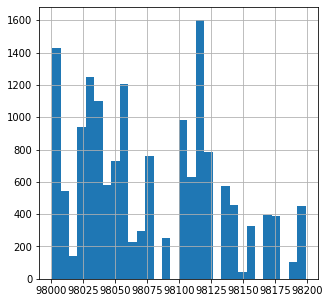

In [24]:
X_train['zipcode'].hist(figsize=[5, 5], bins='auto');

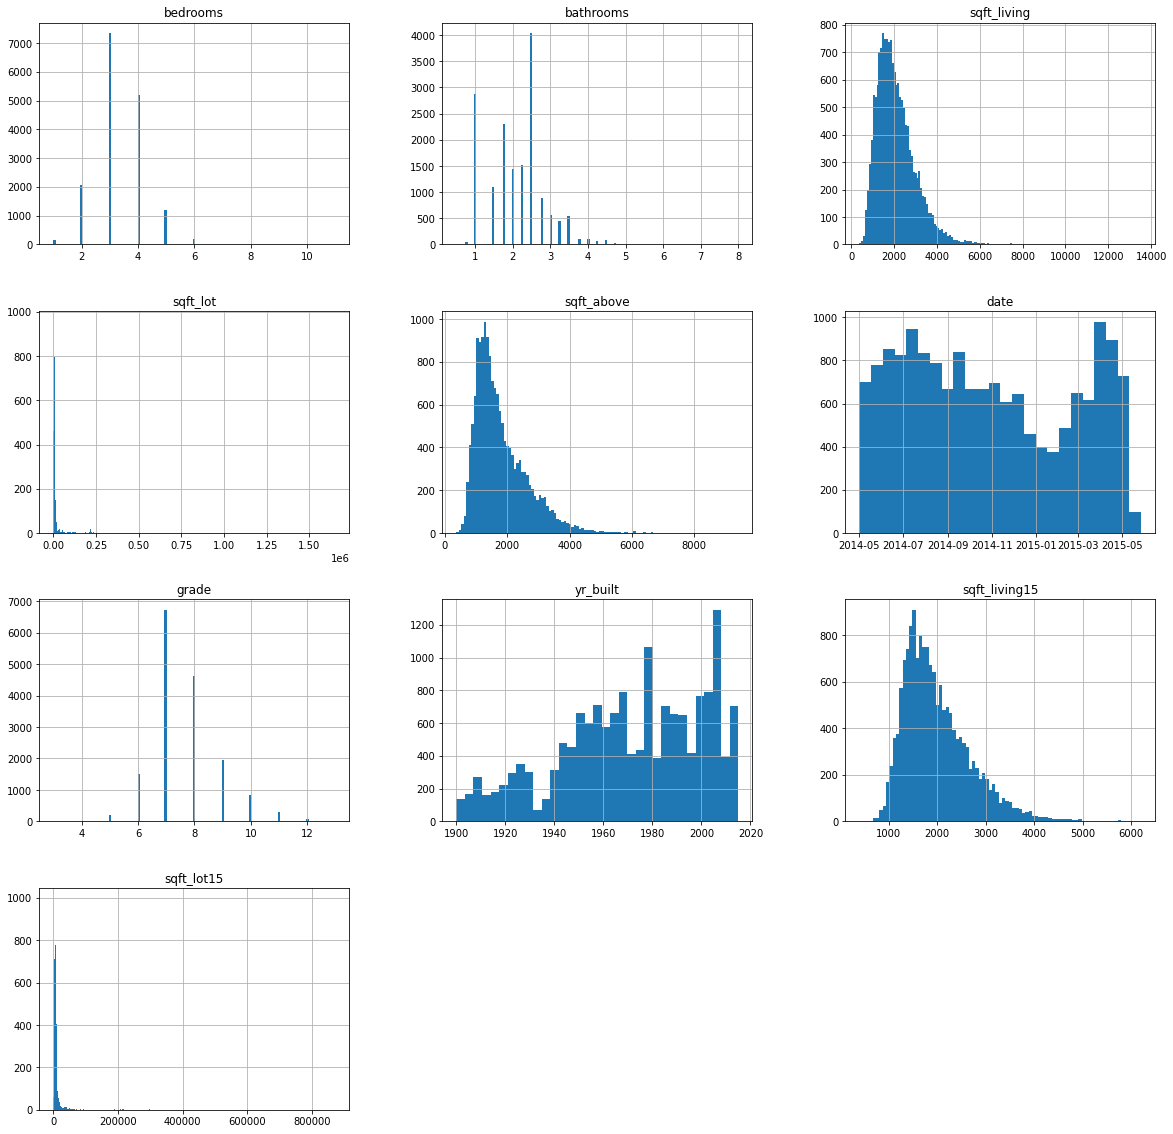

In [25]:
X_train[continuous].hist(figsize=[20, 20], bins='auto');

array([[<AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>],
       [<AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>],
       [<AxesSubplot:title={'center':'sqft_lot15'}>, <AxesSubplot:>]],
      dtype=object)

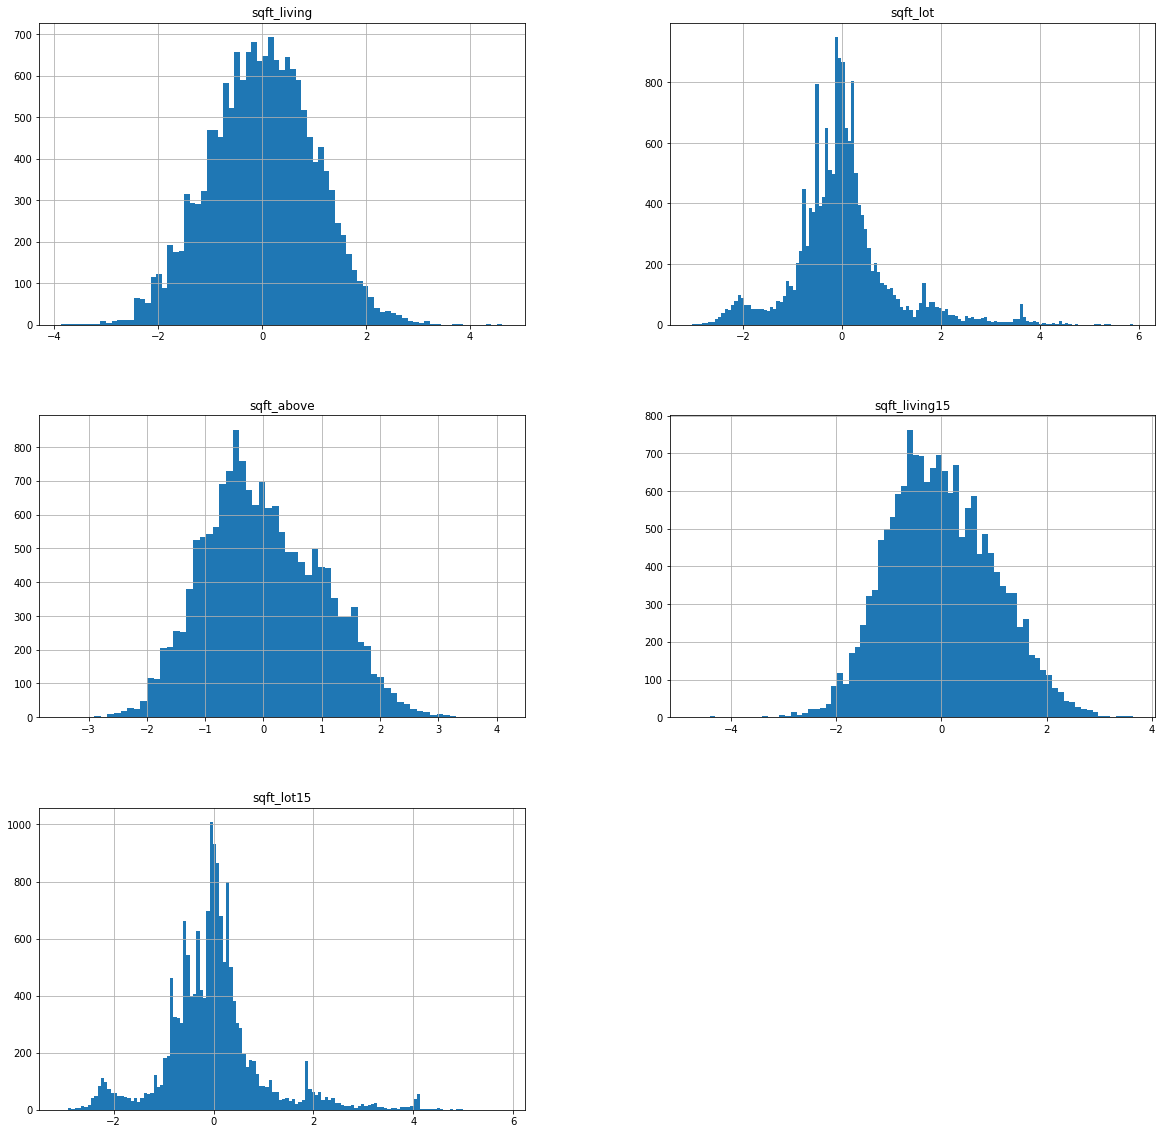

In [26]:
# log transform continuous variables where it makes sense

# log cols
cols_log = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15']

df_transf = pd.DataFrame([])

for feat in cols_log:
    df_transf[feat] = X_train[feat].map(lambda x: np.log(x))
    
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

features_final = df_transf.apply(normalize)

features_final.hist(figsize  = [20, 20], bins='auto')

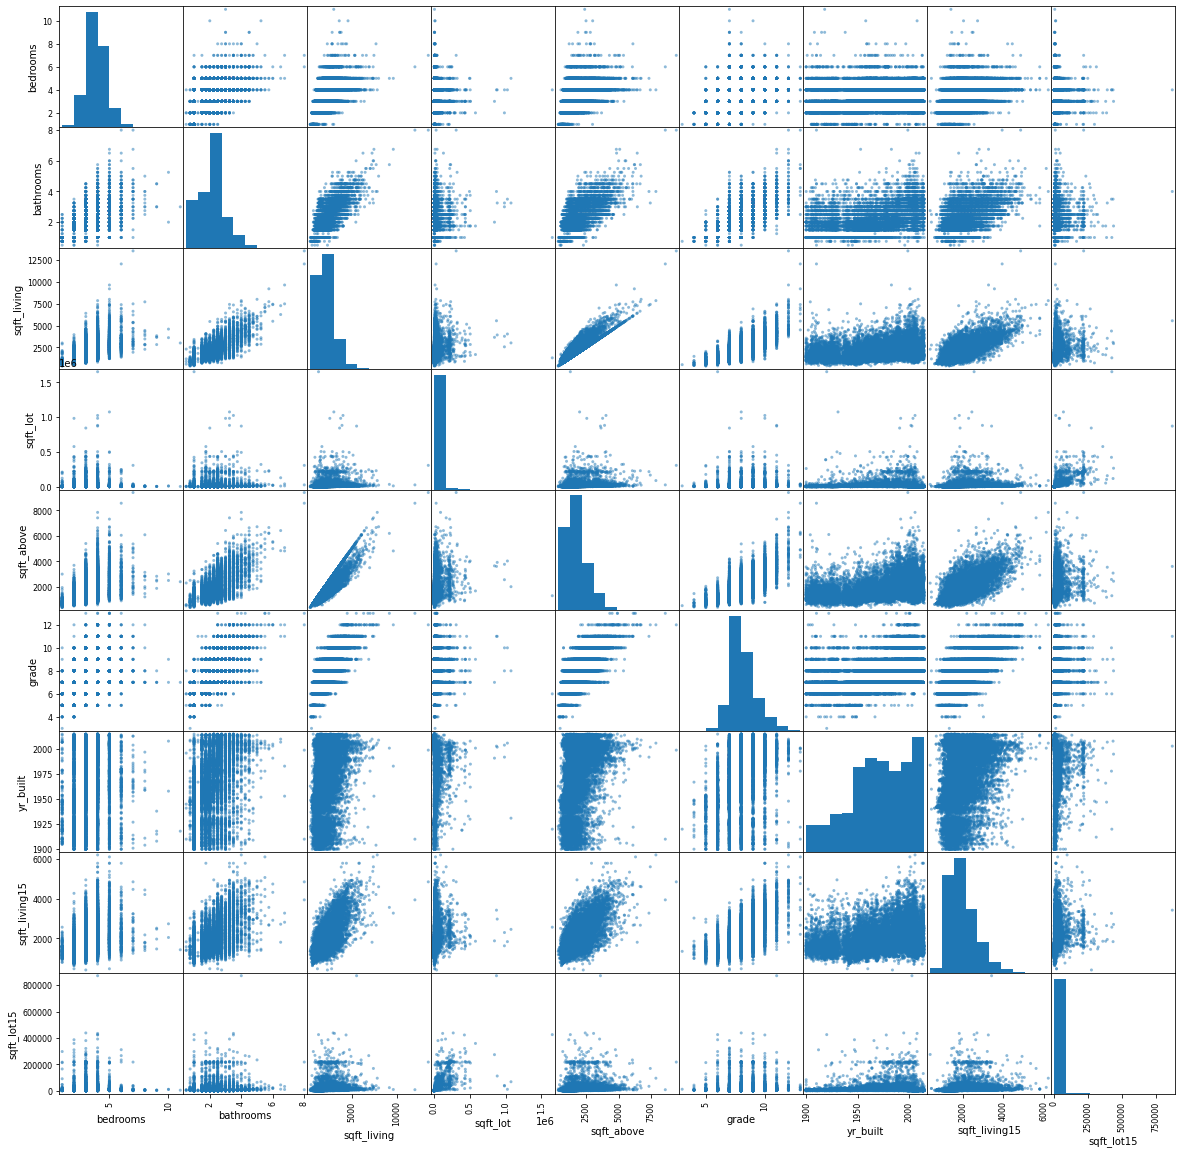

In [27]:
# checking for multicollinearity

pd.plotting.scatter_matrix(X_train[continuous], figsize=(20,20));

In [28]:
abs(X_train[continuous].corr()) > 0.75

,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,grade,yr_built,sqft_living15,sqft_lot15
bedrooms,True,False,False,False,False,False,False,False,False
bathrooms,False,True,True,False,False,False,False,False,False
sqft_living,False,True,True,False,True,True,False,True,False
sqft_lot,False,False,False,True,False,False,False,False,False
sqft_above,False,False,True,False,True,True,False,False,False
grade,False,False,True,False,True,True,False,False,False
yr_built,False,False,False,False,False,False,True,False,False
sqft_living15,False,False,True,False,False,False,False,True,False
sqft_lot15,False,False,False,False,False,False,False,False,True


In [29]:
df_corr=X_train[continuous].corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df_corr['pairs'] = list(zip(df_corr.level_0, df_corr.level_1))

# set index to pairs
df_corr.set_index(['pairs'], inplace = True)

#d rop level columns
df_corr.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df_corr.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df_corr.drop_duplicates(inplace=True)

df_corr[(df_corr.cc>.75) & (df_corr.cc<0.99)]

,cc
pairs,
"(sqft_above, sqft_living)",0.876189
"(grade, sqft_living)",0.761982
"(sqft_living15, sqft_living)",0.759897
"(bathrooms, sqft_living)",0.759379
"(grade, sqft_above)",0.756228


In [30]:
features_final

,sqft_living,sqft_lot,sqft_above,sqft_living15,sqft_lot15
6405,-0.031466,-0.640197,0.334282,0.377823,-0.517948
937,0.137839,-0.222346,-0.510539,-0.292447,-0.509101
19076,2.138383,4.556310,2.076505,0.420507,4.095937
15201,-0.676377,-0.803933,-0.305563,-0.838172,-0.856846
13083,0.412877,1.533846,0.153303,0.625405,2.054669
...,...,...,...,...,...
11964,0.370971,-0.359226,0.733558,0.517840,-0.303994
21575,0.882110,-0.811944,1.240682,-0.119001,-0.397581
5390,-0.517049,0.126789,-0.147487,-0.651901,0.105594
860,-3.800216,0.691850,-3.404866,-1.450586,0.802646


### Simple Preprocessing

In [48]:
X_train.head()

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,zipcode,sqft_living,sqft_lot,sqft_above,yr_built,sqft_living15,sqft_lot15,mth_sold,date
6405,3,2.50,2.0,NO,NONE,Average,8,98029,1880,4499,1880,1993,2130,5114,3,2015-03-04
937,3,2.50,1.0,NO,NONE,Average,7,98042,2020,6564,1310,1994,1710,5151,10,2014-10-07
19076,5,4.00,2.0,NO,NONE,Very Good,9,98027,4720,493534,3960,1975,2160,219542,1,2015-01-16
15201,2,2.00,1.0,NO,NONE,Good,7,98117,1430,3880,1430,1949,1430,3880,3,2015-03-30
13083,3,2.25,1.0,NO,NONE,Good,8,98042,2270,32112,1740,1980,2310,41606,10,2014-10-14


In [49]:
continuous = ['sqft_living']
categoricals = ['grade', 'condition', 'bedrooms', 'bathrooms', 'floors', 
                'waterfront', 'mth_sold', 'view', 'zipcode']

df_cont = X_train[continuous]

# log features
log_names = [f'{column}_log' for column in df_cont.columns]

df_log = np.log(df_cont)
df_log.columns = log_names

# normalize (subract mean and divide by std)

def normalize(feature):
    return (feature - feature.mean()) / feature.std()

df_log_norm = df_log.apply(normalize)

# one hot encode categoricals
df_ohe = pd.get_dummies(X_train[categoricals], prefix=categoricals, drop_first=True)

preprocessed = pd.concat([df_log_norm, df_ohe], axis=1)

X_train_new = preprocessed
y = np.log(df['price'])

ValueError: Length of 'prefix' (9) did not match the length of the columns being encoded (3).

best features = log(sqft_living), not going to use interactions since we care about interpretability of coefficients

### Categoricals

In [34]:
from sklearn.preprocessing import OneHotEncoder

condition = X_train[["condition"]]

# (2) Instantiate a OneHotEncoder with categories="auto",
# sparse=False, and handle_unknown="ignore"
ohe = OneHotEncoder(categories="auto", sparse=False, handle_unknown="ignore")

# (3) Fit the encoder on fireplace_qu_train
ohe.fit(condition)

# Inspect the categories of the fitted encoder
ohe.categories_

condition_encoded = ohe.transform(condition)

# (5a) Make the transformed data into a dataframe
condition_encoded = pd.DataFrame(
    # Pass in NumPy array
    condition_encoded,
    # Set the column names to the categories found by OHE
    columns=ohe.categories_[0],
    # Set the index to match X_train's index
    index=X_train.index
)

X_train.drop("condition", axis=1, inplace=True)

X_train = pd.concat([X_train, condition_encoded], axis=1)
X_train


,bedrooms,bathrooms,floors,waterfront,view,grade,zipcode,sqft_living,sqft_lot,sqft_above,yr_built,sqft_living15,sqft_lot15,mth_sold,date,Average,Fair,Good,Poor,Very Good
6405,3,2.50,2.0,NO,NONE,8,98029,1880,4499,1880,1993,2130,5114,3,2015-03-04,1.0,0.0,0.0,0.0,0.0
937,3,2.50,1.0,NO,NONE,7,98042,2020,6564,1310,1994,1710,5151,10,2014-10-07,1.0,0.0,0.0,0.0,0.0
19076,5,4.00,2.0,NO,NONE,9,98027,4720,493534,3960,1975,2160,219542,1,2015-01-16,0.0,0.0,0.0,0.0,1.0
15201,2,2.00,1.0,NO,NONE,7,98117,1430,3880,1430,1949,1430,3880,3,2015-03-30,0.0,0.0,1.0,0.0,0.0
13083,3,2.25,1.0,NO,NONE,8,98042,2270,32112,1740,1980,2310,41606,10,2014-10-14,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,3,2.50,2.0,NO,NONE,7,98065,2230,5800,2230,2004,2230,6088,9,2014-09-15,1.0,0.0,0.0,0.0,0.0
21575,4,2.75,2.0,NO,NONE,8,98178,2770,3852,2770,2014,1810,5641,10,2014-10-02,1.0,0.0,0.0,0.0,0.0
5390,4,1.50,1.0,NO,NONE,6,98014,1530,9000,1530,1976,1520,8500,7,2014-07-21,0.0,0.0,1.0,0.0,0.0
860,1,0.75,1.0,NO,NONE,5,98168,380,15000,380,1963,1170,15000,6,2014-06-20,1.0,0.0,0.0,0.0,0.0


In [ ]:
# should do multicolinearity check after dummies are transformed

## Checking Final Model Assumptions

In [ ]:
# Linearity

preds = final_model.predict(X_test_final)
fig, ax = plt.subplots()

perfect_line = np.arange(y_test.min(), y_test.max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(y_test, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

In [ ]:
# Normality of Residuals

import scipy.stats as stats

residuals = (y_test - preds)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

In [ ]:
# Independence

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_train_final.values, i) for i in range(X_train_final.shape[1])]
pd.Series(vif, index=X_train_final.columns, name="Variance Inflation Factor") # looking for below 5

In [ ]:
# Homoscedasticity

fig, ax = plt.subplots()

ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(X_test))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");